<a href="https://colab.research.google.com/github/othoni-hub/NSI/blob/main/M1_NSI_pd%26plt_Pima_Correction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **TRAITEMENT ET VISUALISATION DE DONNÉES EN TABLES AVEC PANDAS ET MATPLOTLIB - Jeu de données "Pima"**

*********************
## Olivier THÖNI

### FACULTÉ d'ÉDUCATION UCO
*********************
*document sous licence Creative Commons - CC : By/NC/SA*

*********************


![](https://drive.google.com/uc?id=1gqKhSgmH1czG68HSLe-fLONw-VvmgCWL)

*********************
*document sous licence Creative Commons - CC : By/NC/SA*

*********************

***Excellents tutos Python ici © :***

* http://www.python-simple.com/ :
    * http://www.python-simple.com/python-pandas/panda-intro.php 
    * http://www.python-simple.com/python-matplotlib/matplotlib-intro.php 




---
## **6. Prévalence du diabète chez les Indiens Pima**

Analyse Exploratoire de Données en utilisant ***Pandas*** et ***matplotlib***, prétraîtement sur un jeu de données concernant la détection de patients diabétiques, disponible au format **.csv** ici :

http://www.calvin.edu/~stob/courses/m243/S10/pima.csv

... ou là : https://frama.link/OT_pima 

**L'objet d'étude :**

Les Pima sont un groupe d'Amérindiens vivant en Arizona. Une prédisposition génétique a permis à ce groupe de survivre normalement à un régime pauvre en glucides pendant des années. Ces dernières années, en raison du passage soudain des cultures agricoles traditionnelles aux aliments transformés, ainsi que du déclin de l'activité physique, ils ont développé la plus forte prévalence de diabète de type 2 et c'est pour cette raison qu'ils ont fait l'objet de nombreuses études.

**Les données :**

Elles concernent des jeunes femmes de plus de 21 ans.

**Les variables :**

Les ensembles de données se composent de plusieurs variables prédictives médicales et d'une variable cible, *'Outcome'*. 

Les colonnes sont les suivantes :-
1. **Grossesses** (*Pregnancies*) : Nombre de fois où la femme a été enceinte

2. **Glucose** : Concentration de glucose plasmatique dans un test de tolérance au glucose par voie orale

3. **Pression sanguine** (*BloodPressure*) : Pression sanguine diastolique (mm Hg)

4. **Épaisseur de la peau** (*SkinThickness*) : Épaisseur du pli cutané du triceps (mm)

5. **Insuline** (*Insulin*) : insuline sérique (mu U/ml)

6. **IMC** (*BMI*) : - Indice de masse corporelle (poids en kg/(taille en m)²)

7. **DiabetesPedigreeFunction** : Fonction du pedigree du diabète

8. **Age** : Âge en années

9. **Résultat** (*Outcome*) :  Variable de classe (0 ou 1) 268 sur 768 sont 1, c'est-à-dire positives au diabète de type II, les autres sont 0.







**Corrigé ici :**
https://www.kaggle.com/saurav9786/eda-makes-sense 

---

**Import des bibliothèques et téléchargement des données**

Les données seront désérialisées dans un DataFrame df.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv('http://www.calvin.edu/~stob/courses/m243/S10/pima.csv', sep = ',')

In [ ]:
df.head(5)

,pregnant,glucose,diastolic,triceps,insulin,bmi,diabetes,age,test
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


### **Exploration générale des données et prétraitement :**
* Quelle est la taille du jeu de données ?

In [ ]:
df.shape

(768, 9)

* De quels types sont-elles ?

In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
pregnant     768 non-null int64
glucose      768 non-null int64
diastolic    768 non-null int64
triceps      768 non-null int64
insulin      768 non-null int64
bmi          768 non-null float64
diabetes     768 non-null float64
age          768 non-null int64
test         768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


* Quelles sont les caractéristiques statistiques de ces séries ?

In [ ]:
df.describe()

,pregnant,glucose,diastolic,triceps,insulin,bmi,diabetes,age,test
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


* Y a-t-il des valeurs manquantes ?

In [ ]:
df.isnull().values.any()

False

* Il n'y a pas de valeurs manquantes, mais les valeurs égales à 0 n'ont pas de sens dans les colonnes 2 à 8, nous allons les remplacer par la valeur *'Nan'* ! 

In [ ]:
df[['glucose','diastolic','triceps','insulin','bmi','diabetes','age']]=df[['glucose','diastolic','triceps','insulin','bmi','diabetes','age']].replace(0,np.nan)
df.head()

,pregnant,glucose,diastolic,triceps,insulin,bmi,diabetes,age,test
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


* Compter ces valeurs manquantes dans lesdites colonnes.

In [ ]:
df.isnull().sum()[['glucose','diastolic','triceps','insulin','bmi','diabetes','age']]

glucose        5
diastolic     35
triceps      227
insulin      374
bmi           11
diabetes       0
age            0
dtype: int64

* Remplacer les *'NaN'* par la médiane de la série : en effet, les valeurs manquantes vont perturber les calculs, de proximité entre les individus, par exemple.

In [ ]:
df['glucose'].fillna(df['glucose'].median(),inplace=True)
df['diastolic'].fillna(df['diastolic'].median(),inplace=True)
df['triceps'].fillna(df['triceps'].median(),inplace=True)
df['insulin'].fillna(df['insulin'].median(),inplace=True)
df['bmi'].fillna(df['bmi'].median(),inplace=True)
df.isnull().sum()[['glucose','diastolic','triceps','insulin','bmi','diabetes','age']]

df_sauvegarde = df.copy()

### **Visualisations des variables une à une**

* Effectuer un graphique adapté pour comparer diabétiques et non diabétiques sur l'ensemble de la population étudiée.

In [ ]:

df.groupby('test').size()

test
0    500
1    268
dtype: int64

Pour découvrir une autre bibliothèque dédiée aux graphiques, plus performante encore que MatPlotLib, nous allons utiliser en plus le module SeaBorn.

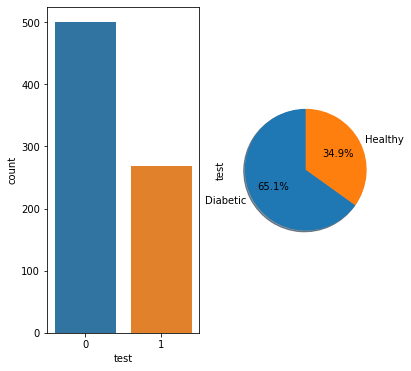

In [ ]:
import seaborn as sns

# countplot----Plot the frequency of the Outcome 'test'

fig1, ax1 = plt.subplots(1,2,figsize=(6,6))

#It shows the count of observations in each categorical bin using bars

sns.countplot(df['test'],ax=ax1[0])

#Find the % of diabetic and Healthy person

labels = 'Diabetic', 'Healthy'

df.test.value_counts().plot.pie(labels=labels, autopct='%1.1f%%',shadow=True, startangle=90)


Environ 2/3 des femmes Pima de plus de 21 ans sont diabétiques !!!

* Effectuer un diagramme adapté pour chaque variable.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f251e06f710>,
      dtype=object)

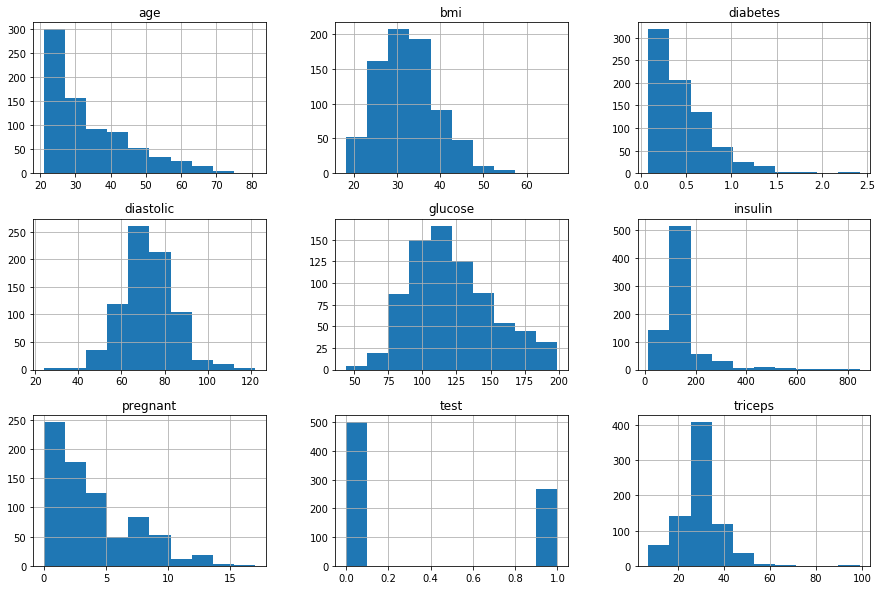

In [ ]:
# Histogram 

df.hist(figsize=(15,10))

* Tracer les boîtes à moustaches (*BoxPlots*) pour chaque variable. QU'est-ce que cela permet de repérer ? Pourquoi avons-nous remplacé les *'NaN'* par la médiane de leur série ?

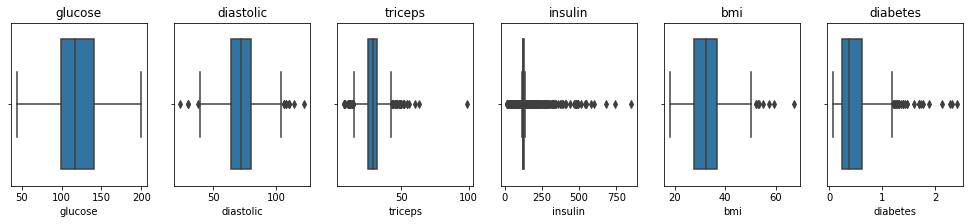

In [ ]:
# boxplot

fig=plt.figure(figsize=(20,3))

for i in np.arange(1,7):
    data3=plt.subplot(1,7,i,title=df.columns[i])
    sns.boxplot(df[df.columns[i]])

### **Visualisation des variables deux à deux**

* Visualiser les nuages de points des variables prises deux à deux.

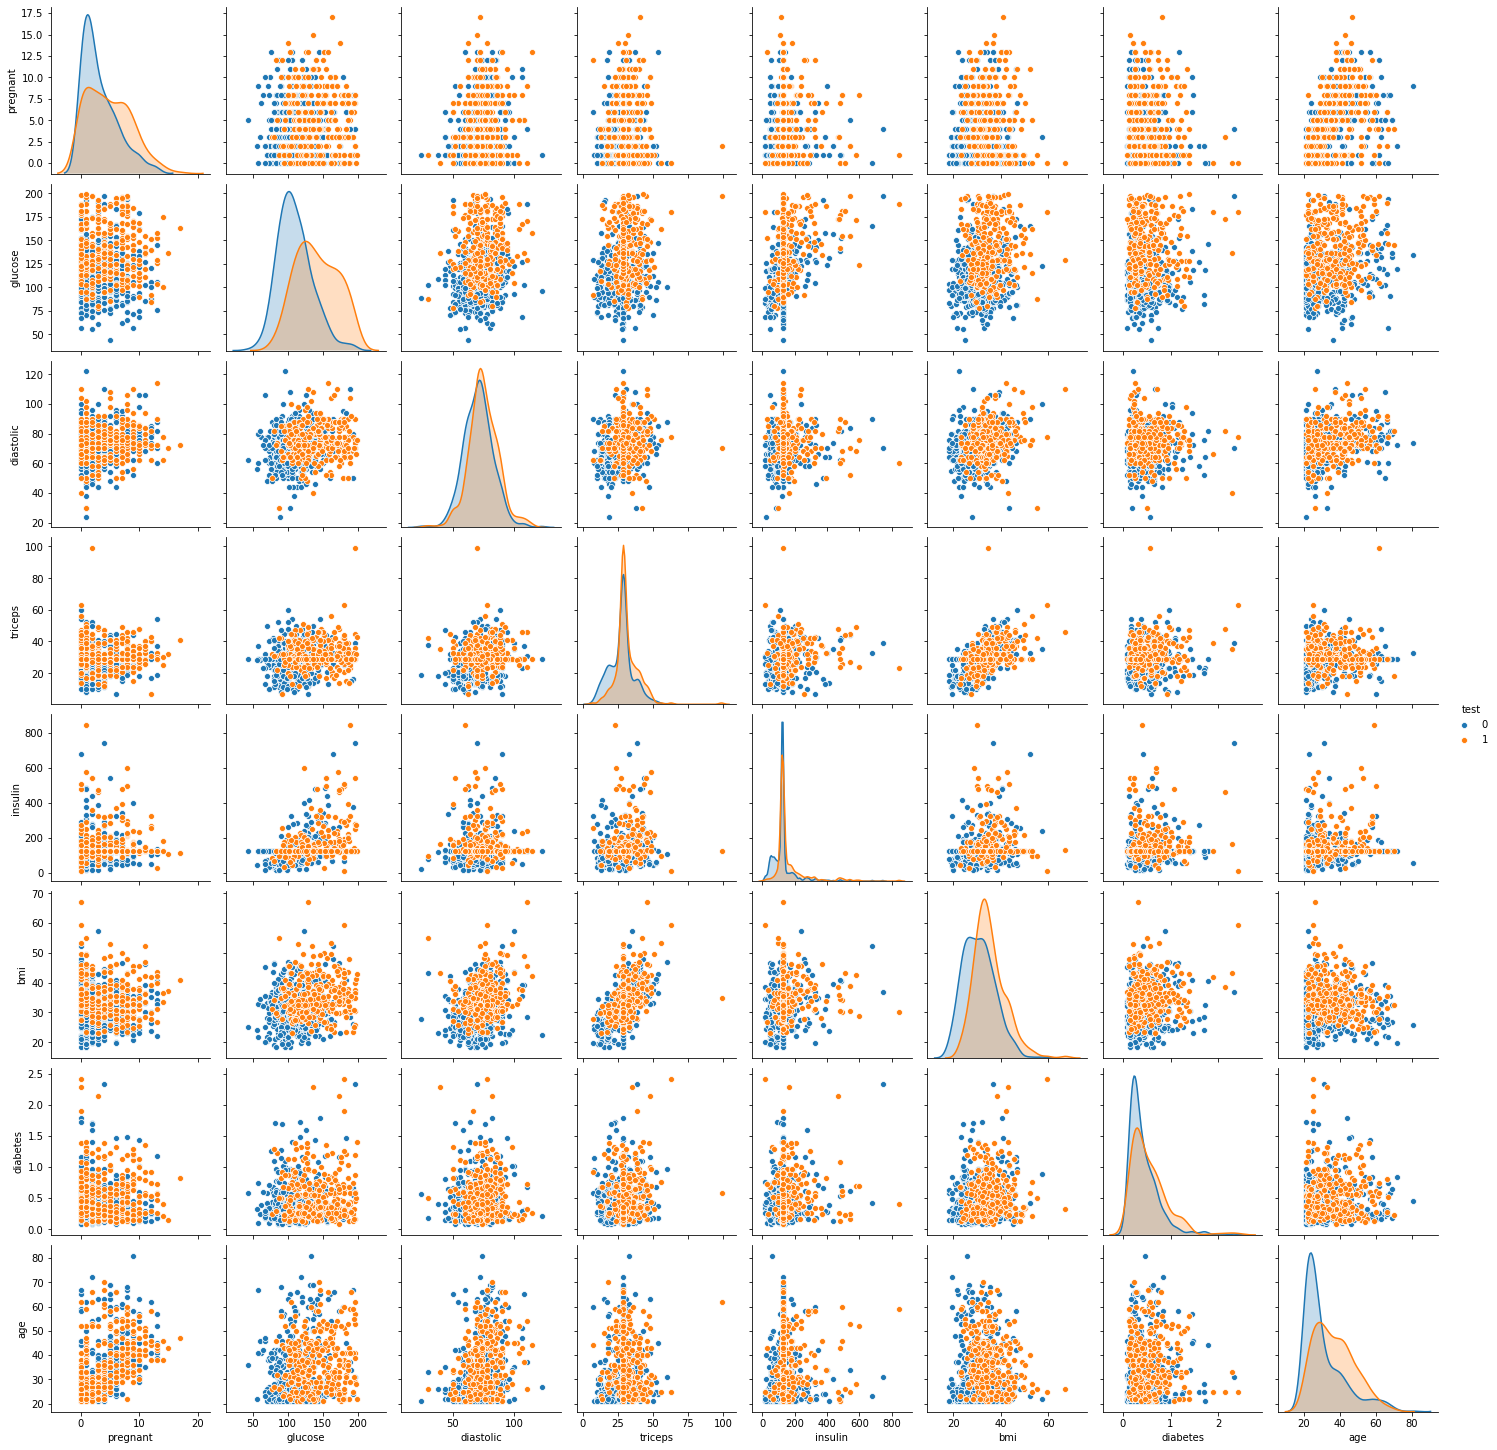

In [ ]:
# pairplot--Multiple relationship of scatterplot

sns.pairplot(df,hue='test')

* Calculer la matrice des corrélations des variables prise deux à deux et faire afficher la ***heatmap***

In [ ]:
cor=df.corr()
cor

,pregnant,glucose,diastolic,triceps,insulin,bmi,diabetes,age,test
pregnant,1.000000,0.128213,0.208615,0.081770,0.025047,0.021559,-0.033523,0.544341,0.221898
glucose,0.128213,1.000000,0.218937,0.192615,0.419451,0.231049,0.137327,0.266909,0.492782
diastolic,0.208615,0.218937,1.000000,0.191892,0.045363,0.281257,-0.002378,0.324915,0.165723
triceps,0.081770,0.192615,0.191892,1.000000,0.155610,0.543205,0.102188,0.126107,0.214873
insulin,0.025047,0.419451,0.045363,0.155610,1.000000,0.180241,0.126503,0.097101,0.203790
bmi,0.021559,0.231049,0.281257,0.543205,0.180241,1.000000,0.153438,0.025597,0.312038
diabetes,-0.033523,0.137327,-0.002378,0.102188,0.126503,0.153438,1.000000,0.033561,0.173844
age,0.544341,0.266909,0.324915,0.126107,0.097101,0.025597,0.033561,1.000000,0.238356
test,0.221898,0.492782,0.165723,0.214873,0.203790,0.312038,0.173844,0.238356,1.000000


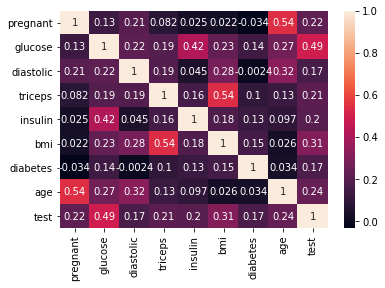

In [ ]:
# correlation plot---heatmap

sns.heatmap(cor,annot=True)

Le graphique de corrélation montre la relation entre les paramètres.

Le glucose, l'âge, l'IMC et les grossesses sont les paramètres les plus corrélés avec le résultat.

L'insuline et la fonction podologique du diabète ont peu de corrélation avec le résultat.

La pression sanguine et l'épaisseur de la peau ont une faible corrélation avec le résultat.

Il existe une faible corrélation entre l'âge et les grossesses, l'insuline et l'épaisseur de la peau, l'IMC et l'épaisseur de la peau, l'insuline et la glycémie.


### **Analyse bivariée du résultat du test en fonction de l'âge**

* Tracer un graphique permettant de visualiser les pourcentages de diabétiques pour chaque tranche d'âge d'amplitude 5 ans (avec une classe '>55')



In [ ]:
a=pd.Series([['21-24'],['25-30'],['31-40'],['41-55'],['>55']])

age_vs_test = df.groupby('test')['age'].value_counts(bins=[0,25,30,40,55,90])
age_vs_test

test  age           
0     (-0.001, 25.0]    222
      (25.0, 30.0]      105
      (30.0, 40.0]       81
      (40.0, 55.0]       59
      (55.0, 90.0]       33
1     (40.0, 55.0]       85
      (30.0, 40.0]       76
      (-0.001, 25.0]     45
      (25.0, 30.0]       45
      (55.0, 90.0]       17
Name: age, dtype: int64

In [ ]:
a=pd.Series([])
for i in df.index:
    if(df.loc[i:i,:]['age']<=24).bool():
        a=a.append(pd.Series(['21-24']))
    elif(df.loc[i:i,:]['age']<=30).bool():
        a=a.append(pd.Series(['25-30']))
    elif(df.loc[i:i,:]['age']<=40).bool():
        a=a.append(pd.Series(['31-40']))
    elif(df.loc[i:i,:]['age']<=55).bool():
        a=a.append(pd.Series(['41-55']))
    else:
        a=a.append(pd.Series(['>55']))
a.reset_index(drop=True,inplace=True)
df['age']=a
df.head()

#Find the number of diabetic person in each age group

data1=df[df['test']==1].groupby('age')[['test']].count()
data1
data1.head()

,test
age,
21-24,31
25-30,59
31-40,76
41-55,85
>55,17


In [ ]:
# Percentage of diabetic Person in each age group

data2=df.groupby('age')[['test']].count()
data1['% Diabetiques']=(data1['test']/data2['test'])*100
data1

,test,% Diabetiques
age,,
21-24,31,14.155251
25-30,59,29.797980
31-40,76,48.407643
41-55,85,59.027778
>55,17,34.000000


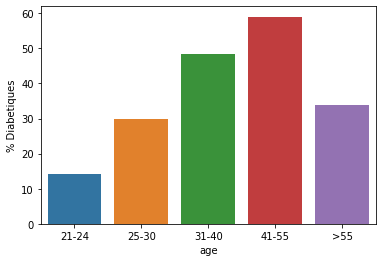

In [ ]:
#4.1 barplot

sns.barplot(data1.index,data1['% Diabetiques'])

L'âge est un facteur de risque de diabète chez les femmes Pima.

Cela pourrait-il être lié à leur nombre de grossesses ?

### **Analyse de l'influence du nombre de grossesses sur le diabète**

In [ ]:
# Crosstab gives the fregency table information ----Pregnancies

pd.crosstab(df['pregnant'],df['test'])

test,0,1
pregnant,,
0,73,38
1,106,29
2,84,19
3,48,27
4,45,23
5,36,21
6,34,16
7,20,25
8,16,22


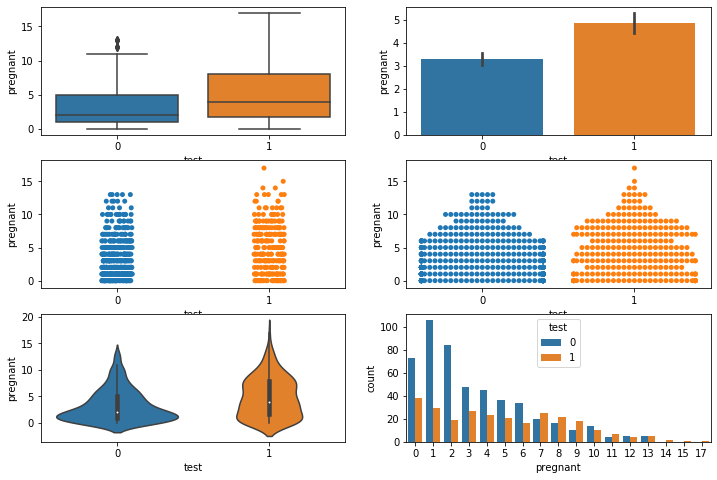

In [ ]:
# Categorical vs Continuous ----Outcome vs Pregnancies

fig, ax2 = plt.subplots(3, 2, figsize=(12, 8))
sns.boxplot(x="test", y="pregnant", data=df,ax=ax2[0][0])
sns.barplot(df['test'], df['pregnant'],ax=ax2[0][1])
sns.stripplot(df['test'], df['pregnant'], jitter=True,ax=ax2[1][0])
sns.swarmplot(df['test'], df['pregnant'], ax=ax2[1][1])
sns.violinplot(df['test'], df['pregnant'], ax=ax2[2][0])
sns.countplot(x='pregnant',hue='test',data=df,ax=ax2[2][1])

Ceci confirme qu'effectivement, les grossesses agravent le risque de diabète.

### **Influence de l'IMC**

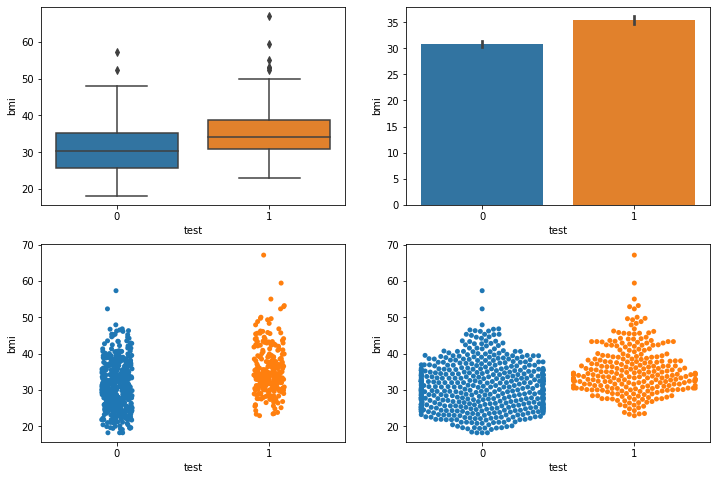

In [ ]:
# Categorical vs Continuous ----Outcome vs BMI

fig, ax2 = plt.subplots(2, 2, figsize=(12, 8))
sns.boxplot(x="test", y="bmi", data=df,ax=ax2[0][0])
sns.barplot(df['test'], df['bmi'],ax=ax2[0][1])
sns.stripplot(df['test'], df['bmi'], jitter=True,ax=ax2[1][0])
sns.swarmplot(df['test'], df['bmi'], ax=ax2[1][1])

In [ ]:
df_sauvegarde.head()

,pregnant,glucose,diastolic,triceps,insulin,bmi,diabetes,age,test
0,6,148.0,72.0,35.0,125.0,33.6,0.627,50,1
1,1,85.0,66.0,29.0,125.0,26.6,0.351,31,0
2,8,183.0,64.0,29.0,125.0,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


### **Analyse de l'influence conjointe de l'âge et du nombre de grossesses**

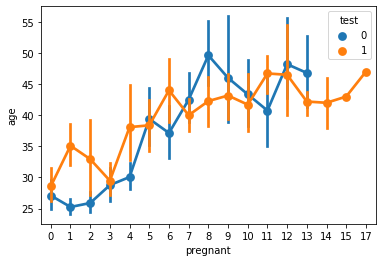

In [ ]:
# lmplot---linear Regression plots
df = pd.read_csv('http://www.calvin.edu/~stob/courses/m243/S10/pima.csv', sep = ',')
sns.pointplot(df['pregnant'], df['age'], hue=df['test'])

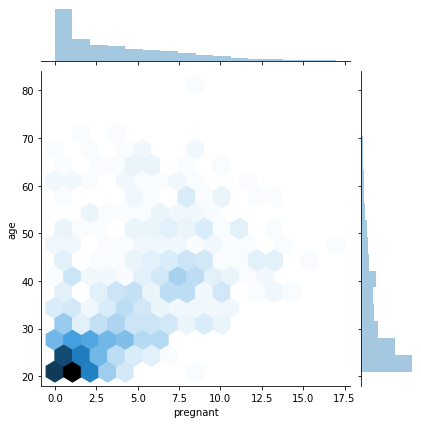

In [ ]:
sns.jointplot(df['pregnant'], df['age'], kind='hex')


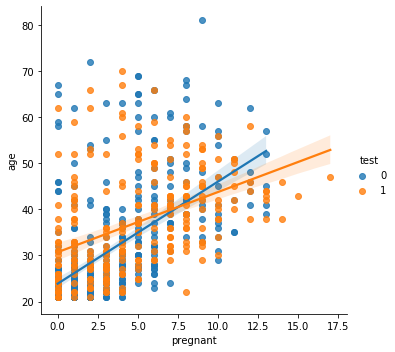

In [ ]:
sns.lmplot(x='pregnant',y='age',data=df,hue='test')